In [1]:
# Run on CCA
import sys
sys.path.insert(1, '/home/jovyan/home/tools')
sys.path.insert(1, '/home/jovyan/home/tools/abg_python')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from abg_python.snapshot_utils import openSnapshot
from abg_python.cosmo_utils import load_AHF
from itk.itk import inrange, loadpickle, pickle_save_dict, n_array_equal
from numba import njit
from tqdm import tqdm

In [120]:
exec(open('scripts/halo_analysis_scripts.py').read())

# m13, $z \approx 1.8$

## Profile data I/O

In [5]:
all_profiles_m13_z_1_8 = {}

In [3]:
# Quest (m13 no feedback) write
for sim in ['h206', 'h29', 'h113', 'h2']:
    simname = sim + '_HR_sn1dy300ro100ss'
    snapnum = 187
    p0 = load_p0(f'/projects/b1026/anglesd/FIRE/{simname}', snapnum, ahf_path=f'/projects/b1026/halo_files/anglesd_m13/{simname}')
    profiles(p0, outfile=f'data/{simname}_{snapnum}.pkl');

/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.0.hdf5
This is a cosmological snapshot... converting to physical units
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.1.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.2.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.3.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.0.hdf5
This is a cosmological snapshot... converting to physical units
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.1.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.2.hdf5
/projects/b1026/anglesd/FIRE/h206_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.3.hdf5
Loading redshift 1.799999681531304
h206 167.4216218297942
/projects/b1026/anglesd/FIRE/h29_HR_sn1dy300ro100ss/snapdir_187/snapshot_187.0.hdf5
This is a cosmological snapshot... converting to p

In [6]:
# Quest (m13 no feedback) read
for sim in ['h206', 'h29', 'h113', 'h2']:
    simname = sim + '_HR_sn1dy300ro100ss'
    snapnum = 187
    all_profiles_m13_z_1_8[simname] = loadpickle(f'data/{simname}_{snapnum}.pkl')

In [7]:
# CCA (m13 feedback) write
snapnum = 37
p0 = load_p0(CCA_sims['push']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h206_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h206_push_{snapnum}.pkl');

p0 = load_p0(CCA_sims['push']['h29']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h29_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h29_push_{snapnum}.pkl');

p0 = load_p0(CCA_sims['jet']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h206_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h206_jet_{snapnum}.pkl');

p0 = load_p0(CCA_sims['spawn']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_1_8['h206_HR_sn1dy300ro100ss']['Rvir'])
profiles(p0, outfile=f'data/h206_spawn_{snapnum}.pkl');

/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
Loading redshift 1.7999996640070286


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in float_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in float_scalars


/home/jovyan/fire2/AGN_suite/m13h29_m3e5/m13h29_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp5e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
/home/jovyan/fire2/AGN_suite/m13h29_m3e5/m13h29_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp5e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
Loading redshift 1.799999664018022
/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
/home/jovyan/fire2/AGN_suite/m13h206_m3e5/m13h206_m3e5_jet_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp3e-3_mw4e-7_fa0.5_tw1e4_fmom1/output/snapshot_037.hdf5
This is a cosmological snapshot... converting to physical units
Loading redshift 1.7999996640070286
/home/jovyan/fire2/AGN_suite/m1

In [8]:
# CCA (m13 feedback) read
snapnum = 37
all_profiles_m13_z_1_8['h206_push'] = loadpickle(f'data/h206_push_{snapnum}.pkl')
all_profiles_m13_z_1_8['h29_push'] = loadpickle(f'data/h29_push_{snapnum}.pkl')
all_profiles_m13_z_1_8['h206_jet'] = loadpickle(f'data/h206_jet_{snapnum}.pkl')
all_profiles_m13_z_1_8['h206_spawn'] = loadpickle(f'data/h206_spawn_{snapnum}.pkl')

## Temperature Profile

Text(0.5, 1.0, '$z \\approx 1.8$')

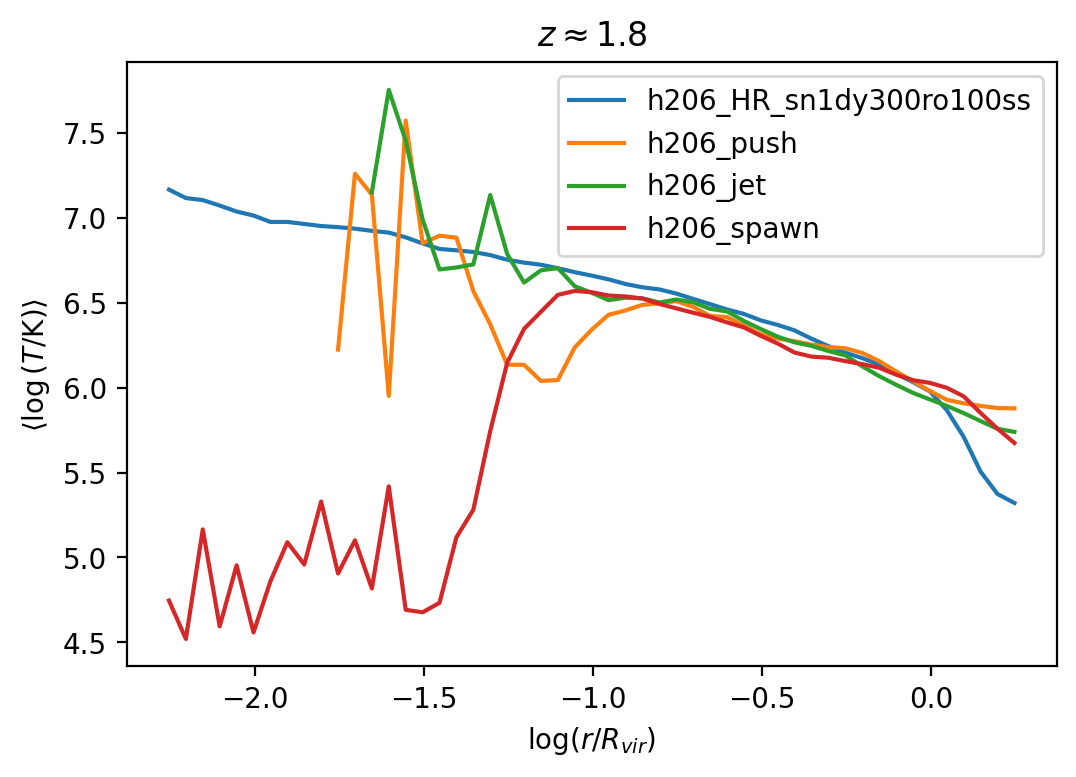

In [45]:
plt.figure(dpi=200)
for sim in all_profiles_m13_z_1_8.keys():
    if 'h206' not in sim:
        continue
    rmid, logTavgbins = all_profiles_m13_z_1_8[sim]['rmid'], all_profiles_m13_z_1_8[sim]['logTavgbins']
    plt.plot(np.log10(rmid), logTavgbins, label=sim)

plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(r'$\left<\log \left(T/\mathrm{K}\right)\right>$')
plt.legend()
plt.title(r'$z \approx 1.8$')
# plt.savefig('Figures/Tprofile_h206_z_1_8.png')

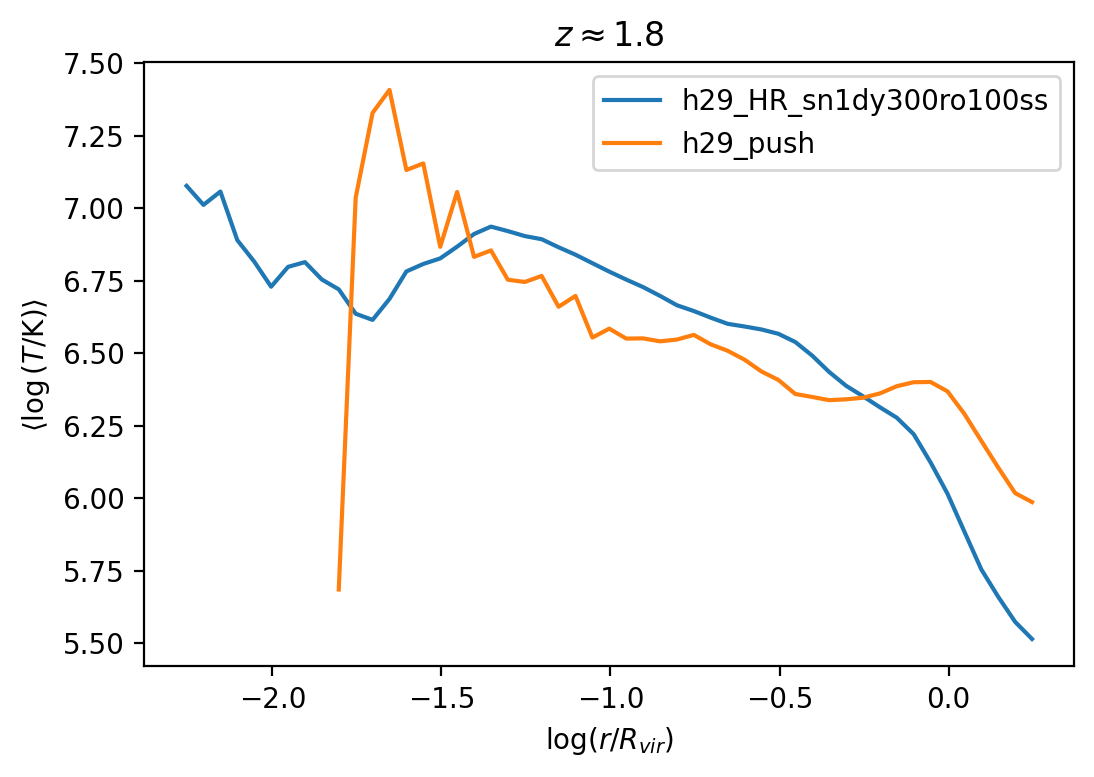

In [47]:
plt.figure(dpi=200)
for sim in all_profiles_m13_z_1_8.keys():
    if 'h29' not in sim:
        continue
    rmid, logTavgbins = all_profiles_m13_z_1_8[sim]['rmid'], all_profiles_m13_z_1_8[sim]['logTavgbins']
    plt.plot(np.log10(rmid), logTavgbins, label=sim)

plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(r'$\left<\log \left(T/\mathrm{K}\right)\right>$')
plt.legend()
plt.title(r'$z \approx 1.8$')
# plt.savefig('Figures/Tprofile_h29_z_1_8.png')

## Density Profile

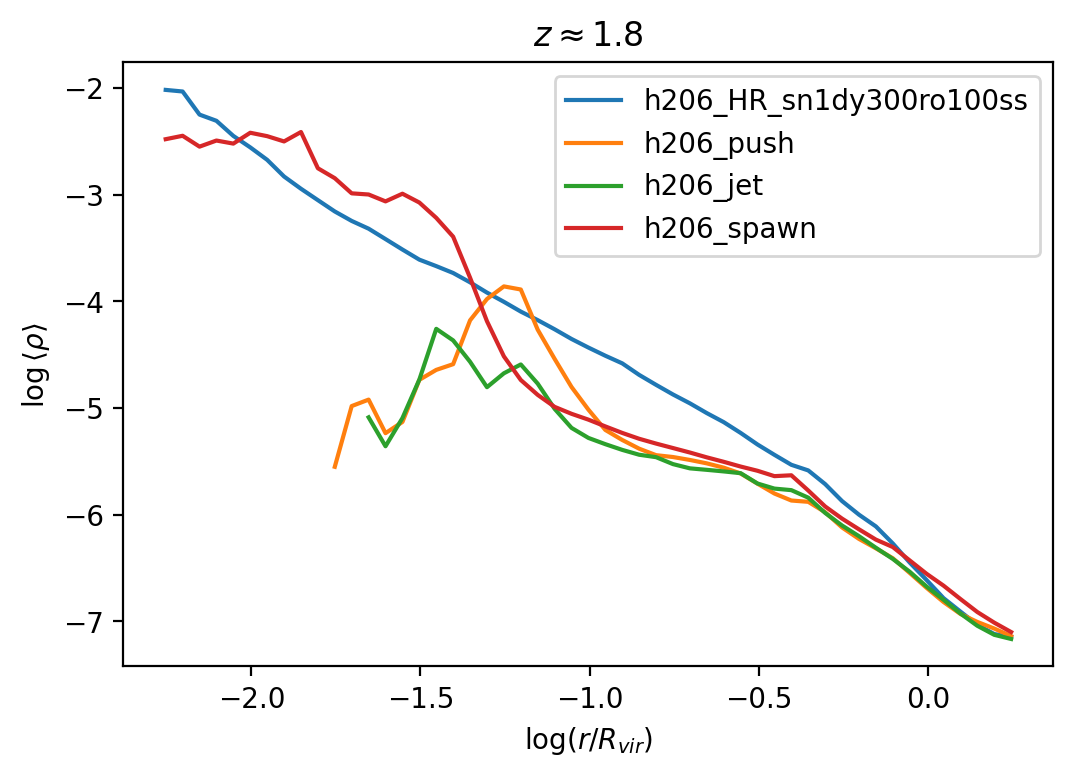

In [43]:
plt.figure(dpi=200)
for sim in all_profiles_m13_z_1_8.keys():
    if 'h206' not in sim:
        continue
    rmid, rhoavgbins = all_profiles_m13_z_1_8[sim]['rmid'], all_profiles_m13_z_1_8[sim]['rhoavgbins']
    plt.plot(np.log10(rmid), np.log10(rhoavgbins), label=sim)

plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(r'$\log \left<\rho \right>$')
plt.legend()
plt.title(r'$z \approx 1.8$')
# plt.savefig('Figures/rhoprofile_h206_z_1_8.png')

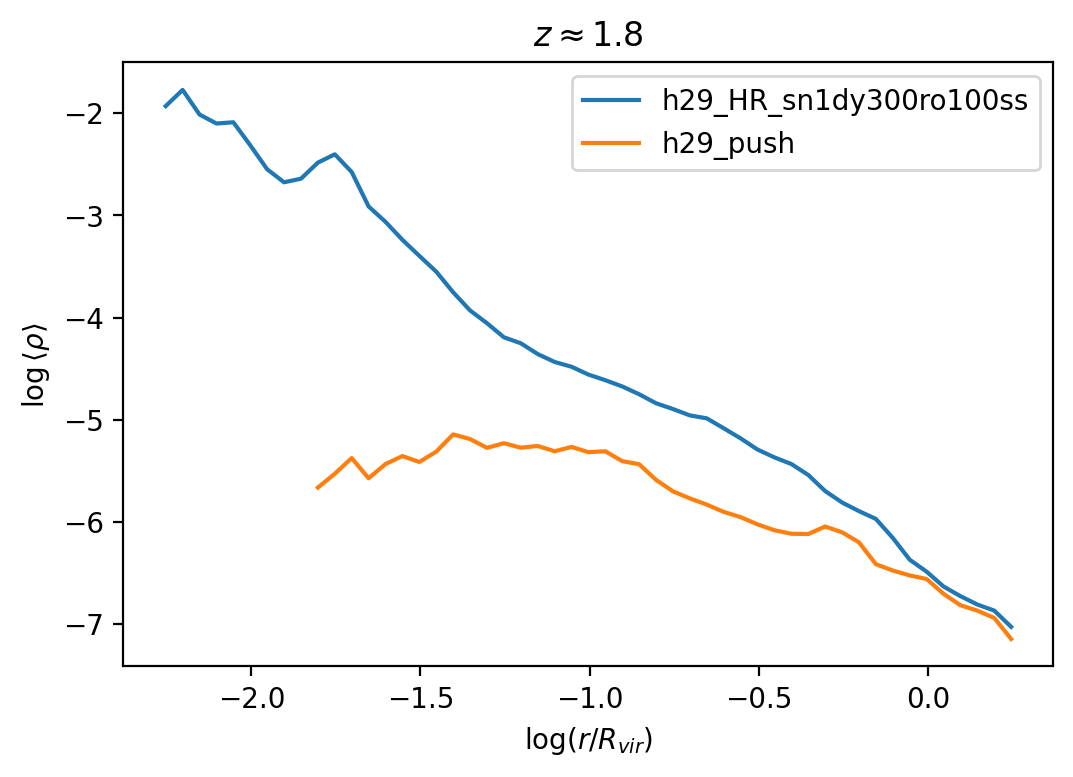

In [48]:
plt.figure(dpi=200)
for sim in all_profiles_m13_z_1_8.keys():
    if 'h29' not in sim:
        continue
    rmid, rhoavgbins = all_profiles_m13_z_1_8[sim]['rmid'], all_profiles_m13_z_1_8[sim]['rhoavgbins']
    plt.plot(np.log10(rmid), np.log10(rhoavgbins), label=sim)

plt.xlabel(r'$\log (r/R_{vir})$')
plt.ylabel(r'$\log \left<\rho \right>$')
plt.legend()
plt.title(r'$z \approx 1.8$')
# plt.savefig('Figures/rhoprofile_h29_z_1_8.png')

# m13, $z \sim 1.8$ bin

In [4]:
# Quest (m13 no feedback) write
for sim in ['h206', 'h29', 'h113', 'h2']:
    simname = sim + '_HR_sn1dy300ro100ss'
    for snapnum in tqdm(range(177,197)):
        p0 = load_p0(f'/projects/b1026/anglesd/FIRE/{simname}', snapnum, ahf_path=f'/projects/b1026/halo_files/anglesd_m13/{simname}', loud=0)
        profiles(p0, outfile=f'data/{simname}_{str(snapnum).zfill(3)}.pkl');

  0%|          | 0/20 [00:00<?, ?it/s]/home/ias627/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in float_scalars
/home/ias627/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in float_scalars
100%|██████████| 20/20 [26:15<00:00, 78.76s/it]


In [5]:
all_profiles_m13_z_all = {}
# Quest (m13 no feedback) read
for sim in ['h206', 'h29', 'h113', 'h2']:
    simname = sim + '_HR_sn1dy300ro100ss'
    all_profiles_m13_z_all[simname] = {}
    for snapnum in tqdm(range(177,197)):
        all_profiles_m13_z_all[simname][snapnum] = loadpickle(f'data/{simname}_{snapnum}.pkl')

100%|██████████| 20/20 [00:00<00:00, 1296.20it/s]


In [9]:
convertdict = {36:179, 37:187, 38:195}

In [12]:
# CCA (m13 feedback) write
for snapnum in range(36,39):
    p0 = load_p0(CCA_sims['push']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_all['h206_HR_sn1dy300ro100ss'][convertdict[snapnum]]['Rvir'], loud=0)
    profiles(p0, outfile=f'data/h206_push_{snapnum}.pkl');

    p0 = load_p0(CCA_sims['jet']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_all['h206_HR_sn1dy300ro100ss'][convertdict[snapnum]]['Rvir'], loud=0)
    profiles(p0, outfile=f'data/h206_jet_{snapnum}.pkl');

    p0 = load_p0(CCA_sims['spawn']['h206']+'/output', snapnum, Rvir=all_profiles_m13_z_all['h206_HR_sn1dy300ro100ss'][convertdict[snapnum]]['Rvir'], loud=0)
    profiles(p0, outfile=f'data/h206_spawn_{snapnum}.pkl');
    
    p0 = load_p0(CCA_sims['push']['h29']+'/output', snapnum, Rvir=all_profiles_m13_z_all['h29_HR_sn1dy300ro100ss'][convertdict[snapnum]]['Rvir'], loud=0)
    profiles(p0, outfile=f'data/h29_push_{snapnum}.pkl');

This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:103: RuntimeWarning: invalid value encountered in float_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: invalid value encountered in float_scalars


This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... converting to physical units
This is a cosmological snapshot... conve

OSError: Snapshot 38 not found in /home/jovyan/fire2/AGN_suite/m13h29_m3e5/m13h29_m3e5_push_alpha10_gacc30_accf1_vw10000_cr1e-2_msd1e-8_sdp5e-3_mw4e-7_fa0.5_tw1e4_fmom1/output

In [16]:
# CCA (m13 feedback) read
all_profiles_m13_z_all['h206_push'] = {}
all_profiles_m13_z_all['h29_push'] = {}
all_profiles_m13_z_all['h206_jet'] = {}
all_profiles_m13_z_all['h206_spawn'] = {}
for snapnum in range(36,39):
    all_profiles_m13_z_all['h206_push'][snapnum] = loadpickle(f'data/h206_push_{snapnum}.pkl')
    all_profiles_m13_z_all['h206_jet'][snapnum] = loadpickle(f'data/h206_jet_{snapnum}.pkl')
    all_profiles_m13_z_all['h206_spawn'][snapnum] = loadpickle(f'data/h206_spawn_{snapnum}.pkl')
    all_profiles_m13_z_all['h29_push'][snapnum] = loadpickle(f'data/h29_push_{snapnum}.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'data/h29_push_38.pkl'

## Density Profile h206

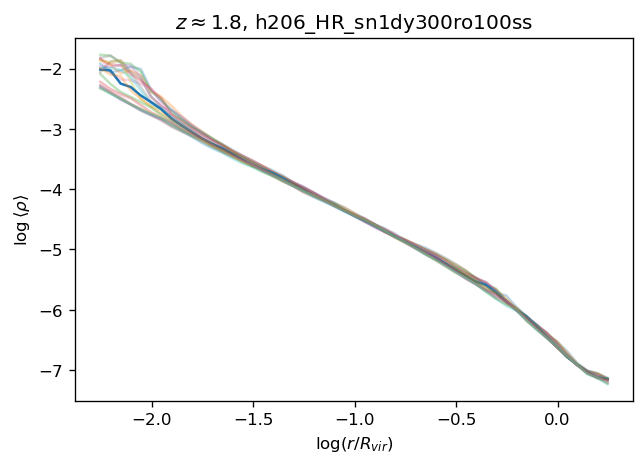

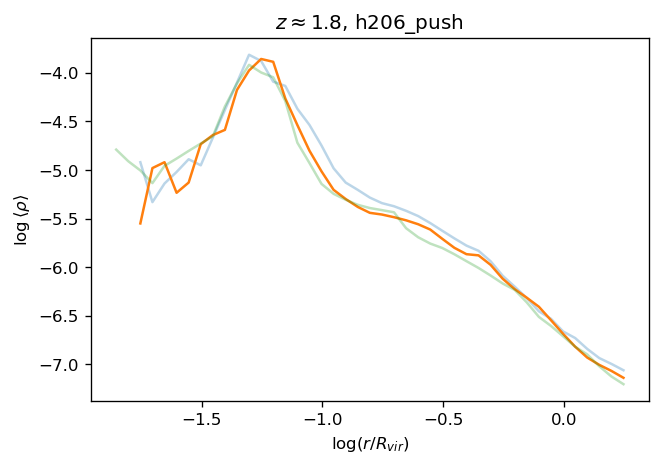

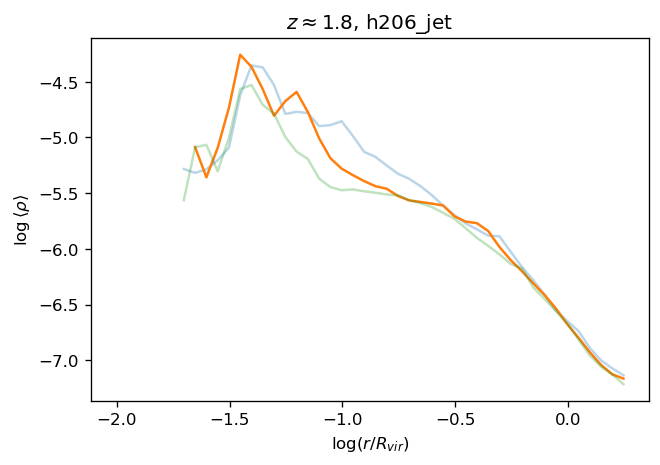

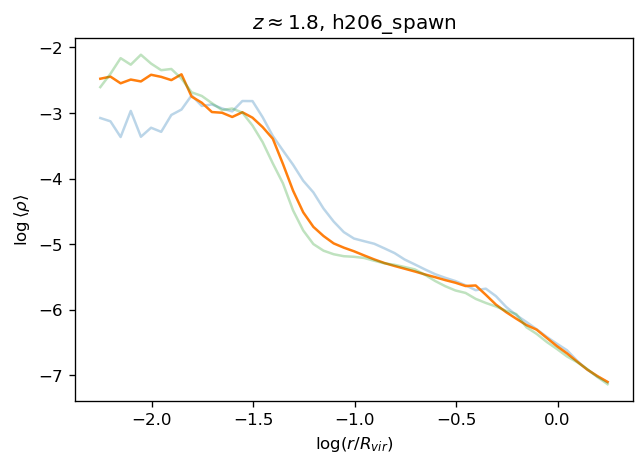

In [51]:
for sim in all_profiles_m13_z_all.keys():
    if 'h206' not in sim:
        continue
    plt.figure(dpi=120)
    for snapnum in all_profiles_m13_z_all[sim].keys():
        rmid, rhoavgbins = all_profiles_m13_z_all[sim][snapnum]['rmid'], all_profiles_m13_z_all[sim][snapnum]['rhoavgbins']
        plt.plot(np.log10(rmid), np.log10(rhoavgbins), label=f'{sim}_{snapnum}', alpha=1 if (snapnum==37 or snapnum==187) else 0.3)

    plt.xlabel(r'$\log (r/R_{vir})$')
    plt.ylabel(r'$\log \left<\rho \right>$')
    # plt.legend()
    plt.title(r'$z \approx 1.8$, ' + str(sim))
    plt.savefig(f'Figures/rhoprofile_{sim}_z_1_8_zbin.png')

# h206 (A1) wide z bins

## h206_HR_sn1dy300ro100ss

In [3]:
# Load redshift of each snapshot
sim = 'h206'
simname = sim + '_HR_sn1dy300ro100ss'
redshifts = redshifts_snapshots(f'/projects/b1026/anglesd/FIRE/{simname}')

In [4]:
# load Rvir of each snapshot
Rvir_allsnaps = {}
totsnaps = 601
hubble = 0.697
ahf_path=f'/projects/b1026/halo_files/anglesd_m13/{simname}'
for snapnum in range(14, 278):
    Rvir_allsnaps[snapnum] = load_AHF('', snapnum, redshifts[snapnum], hubble=hubble, ahf_path=ahf_path, extra_names_to_read=[])[1]

In [7]:
# save Rvir and redshift data
pickle_save_dict(f'data/{simname}_Rvir_redshifts_allsnaps.pkl', {'Rvir_allsnaps':Rvir_allsnaps, 'redshifts':redshifts})

In [5]:
# Compute profiles for all snapshots in each redshift bin
allprofiles = profiles_zbins(f'/projects/b1026/anglesd/FIRE/{simname}', redshifts, Rvir_allsnaps, 
                             outfile=f'data/{simname}_allprofiles_widezbins.pkl')

Beginning bin from z=1.0 to 1.5.
Median redshift is 1.2183096170154997 with snapnum 246 and virial radius Rvir kpc.
Computing profiles for snapshots 215 to 277.


100%|██████████| 63/63 [26:00<00:00, 24.77s/it]


Beginning bin from z=1.5 to 2.0.
Median redshift is 1.7155170072830166 with snapnum 194 and virial radius Rvir kpc.
Computing profiles for snapshots 173 to 214.


100%|██████████| 42/42 [16:48<00:00, 24.01s/it]


Beginning bin from z=2.0 to 2.5.
Median redshift is 2.2164952167499634 with snapnum 158 and virial radius Rvir kpc.
Computing profiles for snapshots 143 to 172.


100%|██████████| 30/30 [12:03<00:00, 24.12s/it]


Beginning bin from z=2.5 to 3.0.
Median redshift is 2.714285289795967 with snapnum 132 and virial radius Rvir kpc.
Computing profiles for snapshots 121 to 142.


100%|██████████| 22/22 [08:55<00:00, 24.35s/it]


Beginning bin from z=3.0 to 3.5.
Median redshift is 3.2105263157894735 with snapnum 112 and virial radius Rvir kpc.
Computing profiles for snapshots 103 to 120.


100%|██████████| 18/18 [07:24<00:00, 24.67s/it]


Beginning bin from z=3.5 to 4.0.
Median redshift is 3.7058823529411766 with snapnum 96 and virial radius Rvir kpc.
Computing profiles for snapshots 89 to 102.


  0%|          | 0/14 [00:00<?, ?it/s]/home/ias627/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in float_scalars
/home/ias627/.conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in float_scalars
100%|██████████| 14/14 [05:54<00:00, 25.32s/it]


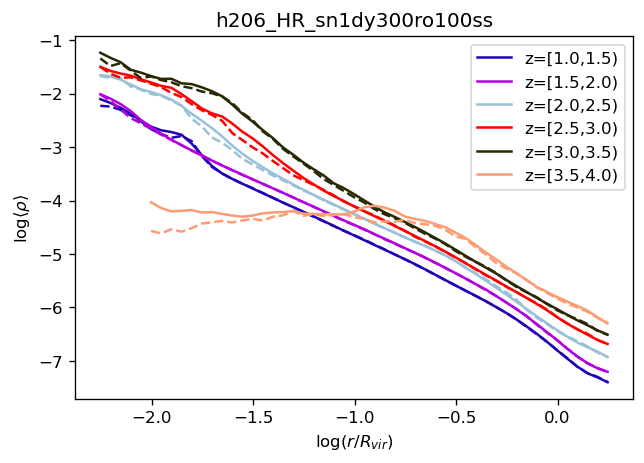

In [82]:
# For each redshift bin, plot mean and median rho profile
plot_rho_profiles_zbins(allprofiles, simname=simname, outfile=f'Figures/rhoprofile_{simname}_widezbins.png')

In [83]:
allprofiles_h206_HR_sn1dy300ro100ss = loadpickle('data/h206_HR_sn1dy300ro100ss_allprofiles_widezbins.pkl')['allprofiles']

## h206 jet, spawn, push

In [4]:
# Load h206_HR_sn1dy300ro100ss Rvir and redshifts
_ = loadpickle(f'data/h206_HR_sn1dy300ro100ss_Rvir_redshifts_allsnaps.pkl')
Rvir_allsnaps_h206_HR_sn1dy300ro100ss, redshifts_h206_HR_sn1dy300ro100ss = _['Rvir_allsnaps'], _['redshifts']

In [5]:
# Load redshift of each snapshot
assert n_array_equal(redshifts_snapshots(CCA_sims['jet']['h206']),
                     redshifts_snapshots(CCA_sims['spawn']['h206']),
                     redshifts_snapshots(CCA_sims['push']['h206'])), \
                     'snapnum to redshift list is different for simulations'
redshifts = redshifts_snapshots(CCA_sims['jet']['h206'])

In [6]:
# Set Rvir_allsnaps
_, idx1, idx2 = np.intersect1d(redshifts, redshifts_h206_HR_sn1dy300ro100ss, return_indices=True)
assert len(idx1)==len(redshifts), 'Redshift match not found for at least one snapshot'

Rvir_allsnaps = { i1:Rvir_allsnaps_h206_HR_sn1dy300ro100ss[i2] for i1, i2 in zip(idx1, idx2) if i2 in Rvir_allsnaps_h206_HR_sn1dy300ro100ss.keys() }


Computing sim h206_jet.
Beginning bin from z=1.0 to 1.5.
Median redshift is 1.2027969794366697 with snapnum 43 and virial radius 220.6924229153515 kpc.
Computing profiles for snapshots 41 to 45.


  0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in float_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in float_scalars
100%|██████████| 5/5 [00:47<00:00,  9.53s/it]


Beginning bin from z=1.5 to 2.0.
Median redshift is 1.7038624404575695 with snapnum 38 and virial radius 174.12786371305597 kpc.
Computing profiles for snapshots 36 to 40.


100%|██████████| 5/5 [00:56<00:00, 11.27s/it]


Beginning bin from z=2.0 to 2.5.
Median redshift is 2.2 with snapnum 33 and virial radius 137.54035150645623 kpc.
Computing profiles for snapshots 31 to 35.


100%|██████████| 5/5 [00:55<00:00, 11.13s/it]


Beginning bin from z=2.5 to 3.0.
Median redshift is 2.692308146745618 with snapnum 28 and virial radius 108.61309041032999 kpc.
Computing profiles for snapshots 26 to 30.


100%|██████████| 5/5 [00:55<00:00, 11.14s/it]


Beginning bin from z=3.0 to 3.5.
Median redshift is 3.2105263157894735 with snapnum 23 and virial radius 90.21251793400289 kpc.
Computing profiles for snapshots 21 to 25.


100%|██████████| 5/5 [00:59<00:00, 11.80s/it]


Beginning bin from z=3.5 to 4.0.
Median redshift is 3.7058823529411766 with snapnum 18 and virial radius 75.88719512195122 kpc.
Computing profiles for snapshots 16 to 20.


100%|██████████| 5/5 [00:57<00:00, 11.46s/it]



Computing sim h206_push.
Beginning bin from z=1.0 to 1.5.
Median redshift is 1.2027969794366697 with snapnum 43 and virial radius 220.6924229153515 kpc.
Computing profiles for snapshots 41 to 45.


  0%|          | 0/5 [00:00<?, ?it/s]/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in float_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in float_scalars
100%|██████████| 5/5 [00:50<00:00, 10.08s/it]


Beginning bin from z=1.5 to 2.0.
Median redshift is 1.7038624404575695 with snapnum 38 and virial radius 174.12786371305597 kpc.
Computing profiles for snapshots 36 to 40.


100%|██████████| 5/5 [00:50<00:00, 10.12s/it]


Beginning bin from z=2.0 to 2.5.
Median redshift is 2.2 with snapnum 33 and virial radius 137.54035150645623 kpc.
Computing profiles for snapshots 31 to 35.


100%|██████████| 5/5 [00:53<00:00, 10.64s/it]


Beginning bin from z=2.5 to 3.0.
Median redshift is 2.692308146745618 with snapnum 28 and virial radius 108.61309041032999 kpc.
Computing profiles for snapshots 26 to 30.


100%|██████████| 5/5 [00:52<00:00, 10.54s/it]


Beginning bin from z=3.0 to 3.5.
Median redshift is 3.2105263157894735 with snapnum 23 and virial radius 90.21251793400289 kpc.
Computing profiles for snapshots 21 to 25.


100%|██████████| 5/5 [00:52<00:00, 10.56s/it]


Beginning bin from z=3.5 to 4.0.
Median redshift is 3.7058823529411766 with snapnum 18 and virial radius 75.88719512195122 kpc.
Computing profiles for snapshots 16 to 20.


100%|██████████| 5/5 [00:53<00:00, 10.64s/it]



Computing sim h206_spawn.
Beginning bin from z=1.0 to 1.5.
Median redshift is 1.2027969794366697 with snapnum 43 and virial radius 220.6924229153515 kpc.
Computing profiles for snapshots 41 to 45.


 60%|██████    | 3/5 [00:31<00:21, 10.53s/it]/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in float_scalars
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: invalid value encountered in float_scalars
100%|██████████| 5/5 [00:52<00:00, 10.47s/it]


Beginning bin from z=1.5 to 2.0.
Median redshift is 1.7038624404575695 with snapnum 38 and virial radius 174.12786371305597 kpc.
Computing profiles for snapshots 36 to 40.


100%|██████████| 5/5 [00:55<00:00, 11.09s/it]


Beginning bin from z=2.0 to 2.5.
Median redshift is 2.2 with snapnum 33 and virial radius 137.54035150645623 kpc.
Computing profiles for snapshots 31 to 35.


100%|██████████| 5/5 [00:53<00:00, 10.76s/it]


Beginning bin from z=2.5 to 3.0.
Median redshift is 2.692308146745618 with snapnum 28 and virial radius 108.61309041032999 kpc.
Computing profiles for snapshots 26 to 30.


100%|██████████| 5/5 [00:53<00:00, 10.65s/it]


Beginning bin from z=3.0 to 3.5.
Median redshift is 3.2105263157894735 with snapnum 23 and virial radius 90.21251793400289 kpc.
Computing profiles for snapshots 21 to 25.


100%|██████████| 5/5 [00:51<00:00, 10.39s/it]


Beginning bin from z=3.5 to 4.0.
Median redshift is 3.7058823529411766 with snapnum 18 and virial radius 75.88719512195122 kpc.
Computing profiles for snapshots 16 to 20.


100%|██████████| 5/5 [00:49<00:00,  9.91s/it]


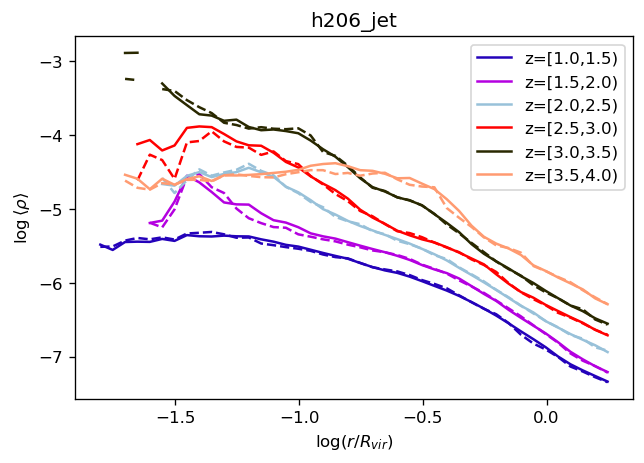

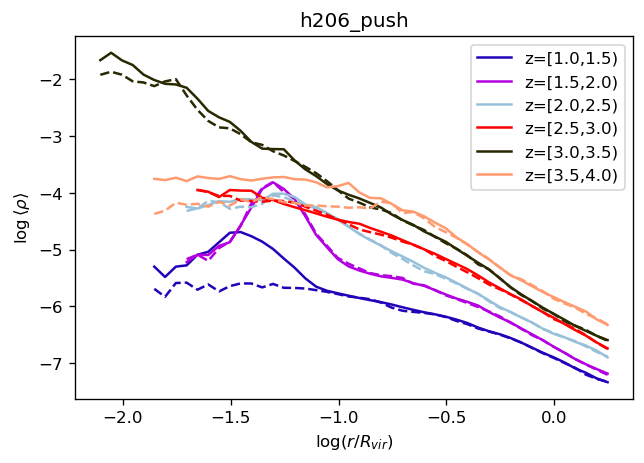

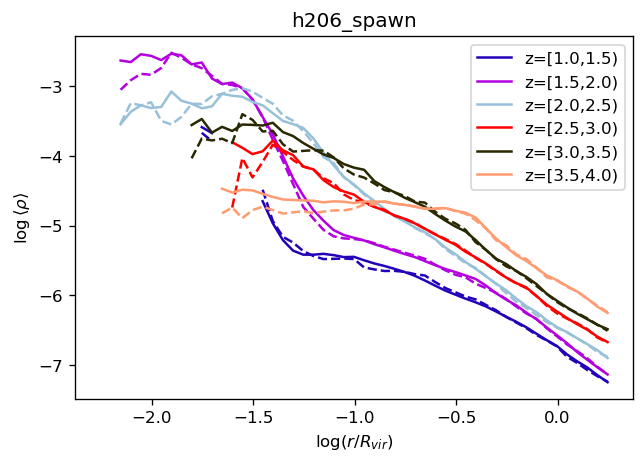

In [9]:
sim = 'h206'
for model in ('jet', 'push', 'spawn'):
    simname = f'{sim}_{model}'
    print(f'\nComputing sim {simname}.')
    # Compute profiles for all snapshots in each redshift bin
    allprofiles = profiles_zbins(CCA_sims[model]['h206']+'/output', redshifts, Rvir_allsnaps, 
                                 outfile=f'data/{simname}_allprofiles_widezbins.pkl')
    # For each redshift bin, plot mean and median rho profile
    plot_rho_profiles_zbins(allprofiles, simname=simname, outfile=f'Figures/rhoprofile_{simname}_widezbins.png')


Computing sim h206_jet.

Computing sim h206_push.

Computing sim h206_spawn.


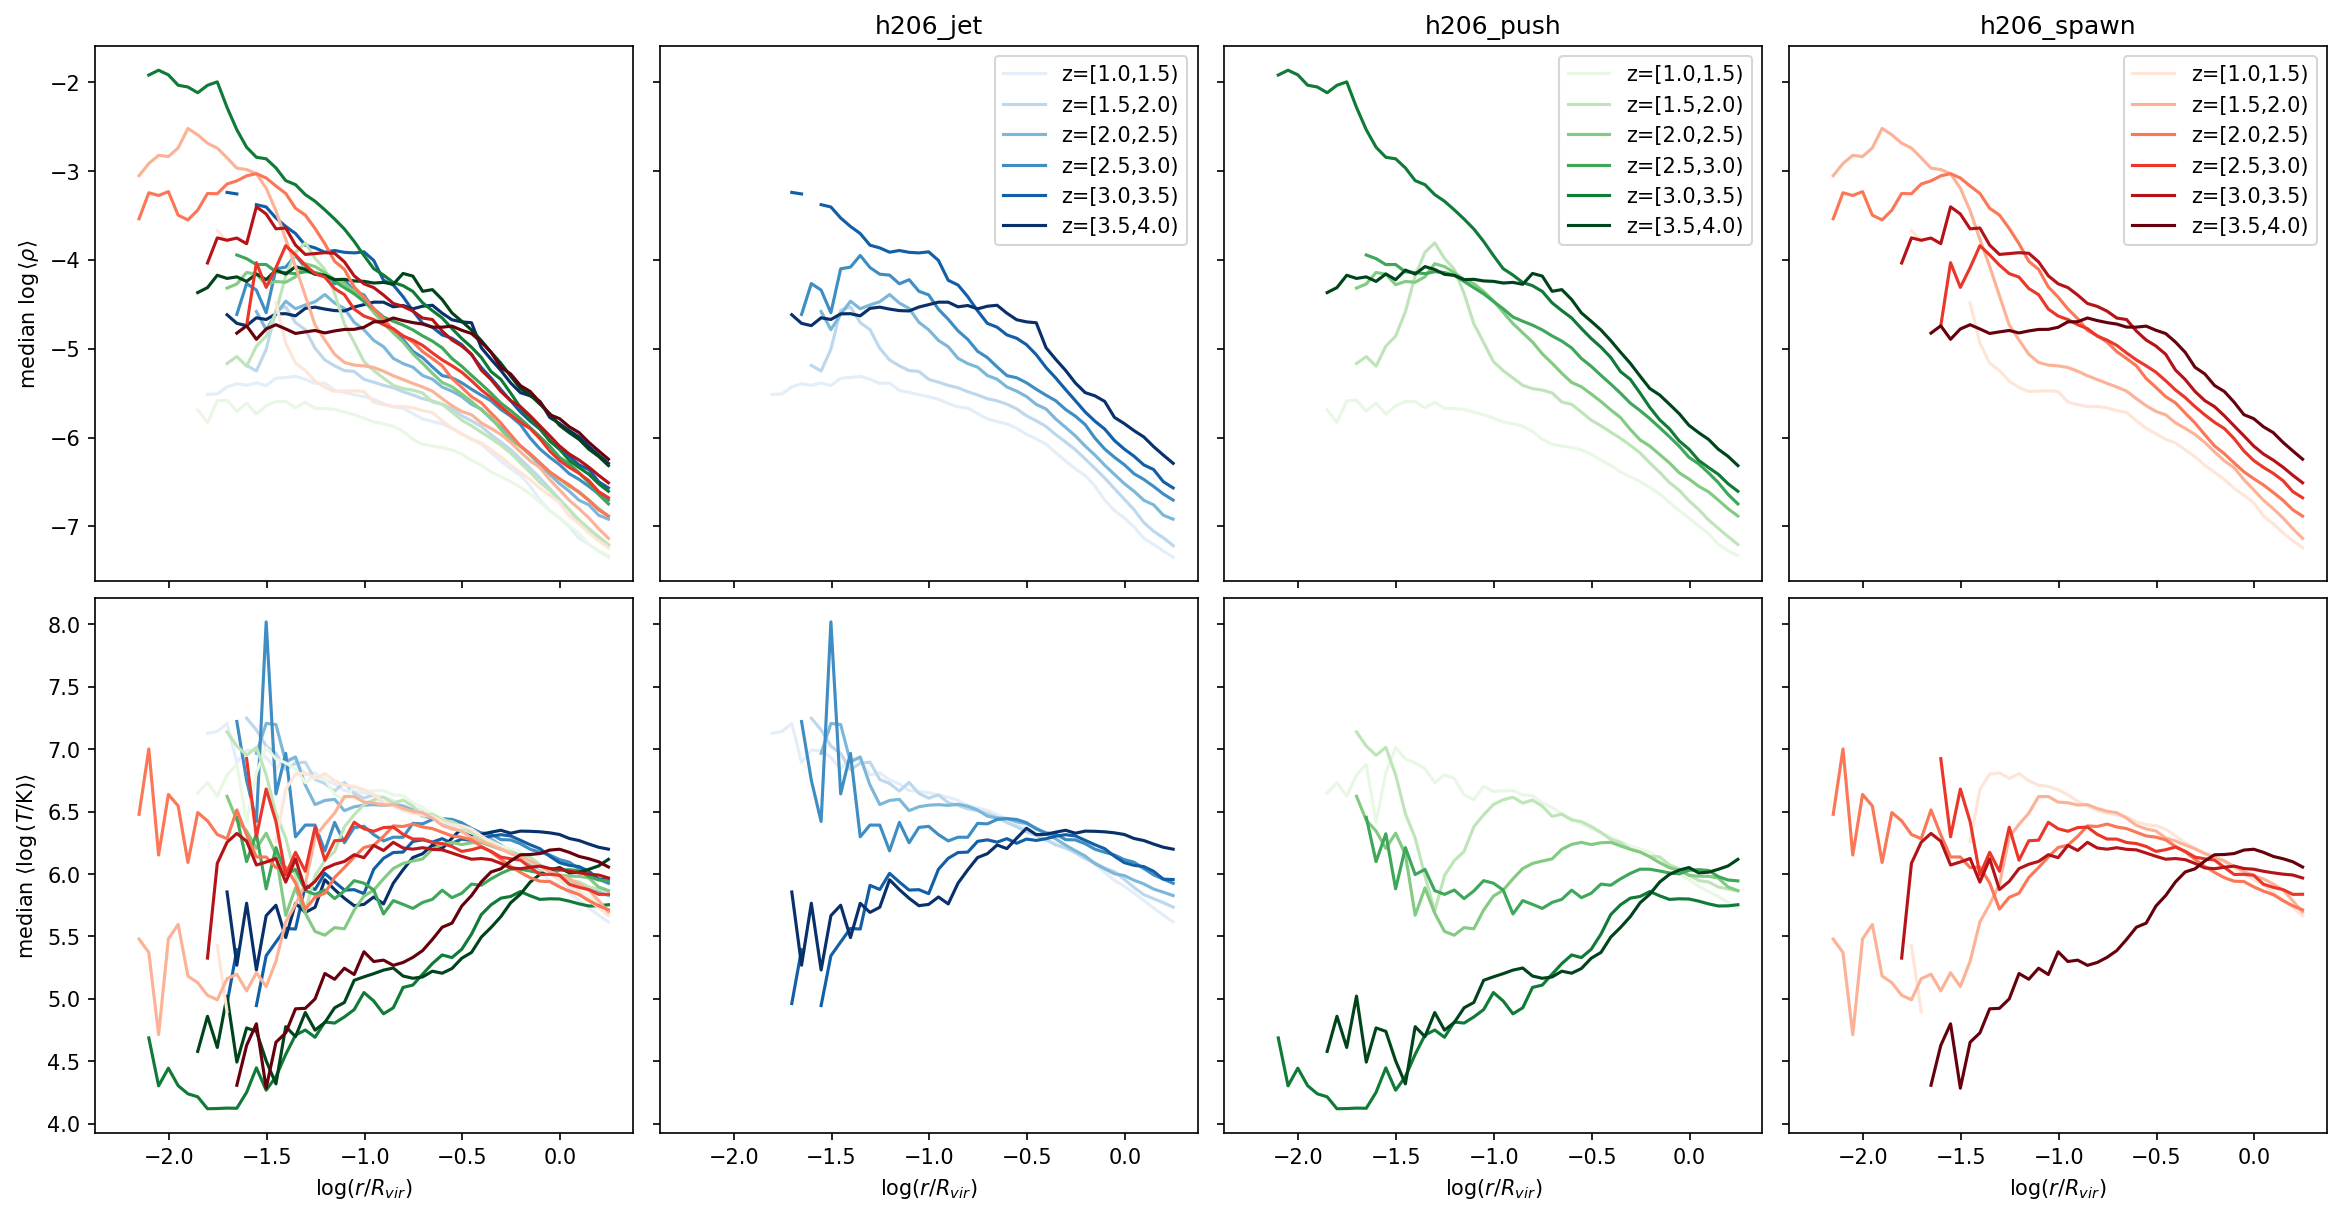

In [130]:
fig, axes = plt.subplots(2, 4, sharex=True, sharey='row', gridspec_kw={'wspace': .05, 'hspace':.03}, figsize=[4.8*4,4.8*2], dpi=150)
cmaps = {'jet':plt.cm.Blues, 'push':plt.cm.Greens, 'spawn':plt.cm.Reds}

# [axes[0].plot([],[],'-',label=k, c=v(0.5)) for k,v in cmaps.items()]
# axes[0].legend()

sim = 'h206'
for i,model in enumerate(['jet', 'push', 'spawn']):
    simname = f'{sim}_{model}'
    print(f'\nComputing sim {simname}.')
    # Load profiles for all snapshots in each redshift bin
    allprofiles = loadpickle(f'data/{simname}_allprofiles_widezbins.pkl')['allprofiles']
    
    # For each redshift bin, plot median rho and T profiles
    plot_profiles_zbins(allprofiles, axes[0,0], cmap=cmaps[model], ylabel=True)
    plot_profiles_zbins(allprofiles, axes[0,i+1], cmap=cmaps[model])
    
    plot_profiles_zbins(allprofiles, axes[1,0], 'T', cmap=cmaps[model], ylabel=True, xlabel=True)
    plot_profiles_zbins(allprofiles, axes[1,i+1], 'T', cmap=cmaps[model], xlabel=True)
    
    axes[0,i+1].legend()
    axes[0,i+1].set_title(simname)

plt.savefig(f'Figures/rho_T_profile_{sim}_AGN_widezbins.png')